Assignment
In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Load the houseprices data from Thinkful's database.
2. Split your data into train and test sets.
3. Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
4. Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
5. Is the performance of your model satisfactory? Why?
6. Try to improve your model in terms of predictive performance by adding or removing some variables.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices', con=engine)

#engine.dispose()

df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Split your data into train and test sets.

In [3]:
features = ['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'fullbath', 'totrmsabvgrd', 'garagecars', 'garagearea']

In [4]:
Y = df.saleprice
X = df[features]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


### Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [6]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     388.2
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:49:04   Log-Likelihood:                -13966.
No. Observations:                1168   AIC:                         2.795e+04
Df Residuals:                    1157   BIC:                         2.801e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.111e+06   1.45e+05     -7.636   

R-sq/adj: (0.770, 0.768), F: 388.2, AIC: 27950, BIC: 28010. Not bad.

### Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

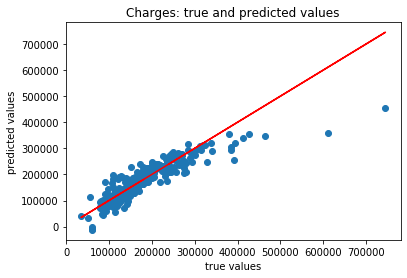

Mean absolute error of the prediction is: 24993.611737481693
Mean squared error of the prediction is: 1485100382.9413202
Root mean squared error of the prediction is: 38537.00018088227
Mean absolute percentage error of the prediction is: 15.080502210197059


In [7]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Try to improve your model in terms of predictive performance by adding or removing some variables.

In [18]:
# reset feature list
features = ['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'fullbath', 'totrmsabvgrd', 'garagecars', 'garagearea']

#df['yearbuilt_garageyrblt'] = df.yearbuilt * df.garageyrblt
#features.append('yearbuilt_garageyrblt')
#features.remove('yearbuilt')
#features.remove('garageyrblt')

df['grlivarea_totrmsabvgrd'] = df.grlivarea * df.totrmsabvgrd
features.append('grlivarea_totrmsabvgrd')
features.remove('grlivarea')
features.remove('totrmsabvgrd')

#df['firstflrsf_totalbsmtsf'] = df.firstflrsf + df.totalbsmtsf
#features.append('firstflrsf_totalbsmtsf')
#features.remove('firstflrsf')
#features.remove('totalbsmtsf')

df['garagearea_garagecars'] = df.garagearea * df.garagecars
features.append('garagearea_garagecars')
features.remove('garagearea')
features.remove('garagecars')

# reset feature list
#features = ['overallqual', 'yearbuilt', 'yearremodadd', 'grlivarea', 'fullbath', 'totrmsabvgrd', 'garagecars', 'garagearea']

df['inside_sf'] = df.totalbsmtsf + df.firstflrsf + df.secondflrsf
features.append('inside_sf')

df['outside_sf'] = df.wooddecksf + df.openporchsf
features.append('outside_sf')

features

['overallqual',
 'yearbuilt',
 'yearremodadd',
 'totalbsmtsf',
 'firstflrsf',
 'fullbath',
 'grlivarea_totrmsabvgrd',
 'garagearea_garagecars',
 'inside_sf',
 'outside_sf']

In [23]:
#Y = df.saleprice
Y = np.log1p(df.saleprice)

X = df[features]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [25]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     663.8
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:52:19   Log-Likelihood:                 523.83
No. Observations:                1460   AIC:                            -1026.
Df Residuals:                    1449   BIC:                            -967.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.0988      0.578      5.360      0.000       1.965       4.233
overallqual                0.0952      0.005     17.880      0.000       0.085       0.106
yearbuilt                  0.0018      0.000      8.295      0.000       0.001       0.002
yearremodadd               0.0021      0.000      7.185      0.000       0.001       0.003
totalbsmtsf               -0.0003   3.65e-05     -7.679      0.000      -0.000      -0.000
firstflrsf              5.697e-05   2.21e-05      2.581      0.010    1.37e-05       0.000
fullbath                  -0.0095      0.012     -0.799      0.424      -0.033       0.014
grlivarea_totrmsabvgrd -1.023e-05   2.33e-06     -4.380      0.000   -1.48e-05   -5.65e-06
garagearea_garagecars   7.032e-05   8.59e-06      8.191      0.000    5.35e-05    8.72e-05
inside_sf                  0.0004    3.2e-05     11.055      0.000       0.000       0.000
outside_sf                 0.0002   3.41e-05      4.655      0.000    9.19e-05       0.000
==============================================================================
Omnibus:                      984.687   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39174.208
Skew:                          -2.594   Prob(JB):                         0.00
Kurtosis:                      27.840   Cond. No.                     1.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

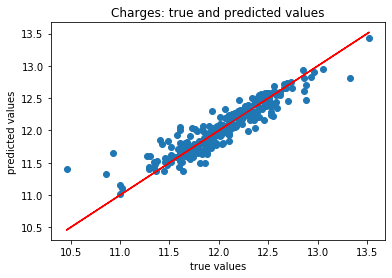

Mean absolute error of the prediction is: 0.11038339399209891
Mean squared error of the prediction is: 0.02478474863894
Root mean squared error of the prediction is: 0.15743172691341475
Mean absolute percentage error of the prediction is: 0.9258997280115144


In [26]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))